In [1]:
# import analysis library
import pandas as pd, numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# credit 
# http://nbviewer.jupyter.org/github/JWarmenhoven/Machine-Learning/blob/master/notebooks/Programming%20Exercise%202%20-%20Logistic%20Regression.ipynb#Logistic-regression-hypothesis


#### Logistic regression hypothesis
##### $$ h_{\theta}(x) = g(\theta^{T}x)$$
##### $$ g(z)=\frac{1}{1+e^{−z}} $$

- $ h_{\theta}(x)$: hypothesis
- $ g(z)$ : sigmoid function 

In [3]:
# define sigmoid function 
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [4]:
x = np.arange(-10,10)
y = sigmoid(x)

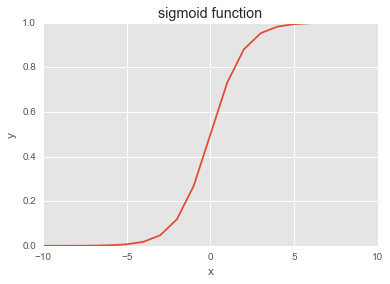

In [5]:
# take a view of sigmoid
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('sigmoid function')

#### Cost Function
##### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
#### Vectorized Cost Function
##### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

# ------------

#### Partial derivative

##### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
#### Vectorized Partial derivative
##### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$

- In this nb, I only run the application with non-vectorize version

In [6]:
# define cost function 
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

# define gradient method 
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [42]:
#np.random.randint(30,size=10)
#np.random.random_integers(0,1,size=10)

In [74]:
#x.shape([1])
toydata = pd.DataFrame({'a':np.random.randint(10,30,size=30),
                        'b':np.random.randint(40,50,size=30),
                        'c':np.random.random_integers(0,1,size=30)})

//anaconda/envs/g_dash/lib/python3.4/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  after removing the cwd from sys.path.


In [75]:
toydata.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
a,12,16,16,22,24,13,26,26,16,19,...,10,17,29,19,11,10,10,23,14,22
b,45,43,46,44,47,47,44,45,41,47,...,41,46,41,47,42,40,41,47,40,46
c,0,0,1,1,1,0,1,1,0,1,...,1,0,1,0,1,1,0,1,0,0


In [76]:
x = np.array(toydata.iloc[:,:2])
y =  np.array(toydata.iloc[:,2:])

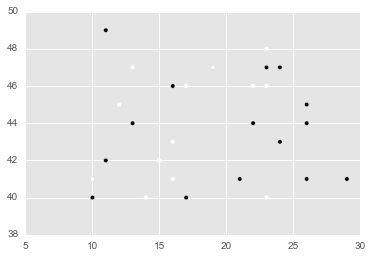

In [77]:
plt.scatter(toydata.a,toydata.b,c=toydata.c)

In [78]:
# let's run toy data with costfunction and gradient function
initial_theta = np.zeros(x.shape[1])
cost = costFunction(initial_theta, x, y)
grad = gradient(initial_theta, x, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.69314718056
Grad: 
 [-1.75       -2.83333333]


### Optimize cost function

In [79]:
from scipy.optimize import minimize
# https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.minimize.html
res = minimize(costFunction, initial_theta, args=(x,y), method=None, jac=gradient, options={'maxiter':400})
res

//anaconda/envs/g_dash/lib/python3.4/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
//anaconda/envs/g_dash/lib/python3.4/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


      fun: 0.6635569969369021
 hess_inv: array([[ 0.14263704, -0.05849076],
       [-0.05849076,  0.0261633 ]])
      jac: array([ -1.21661964e-07,  -4.38803891e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 6
     njev: 10
   status: 0
  success: True
        x: array([ 0.07654629, -0.02586148])

### Predict 

In [80]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [83]:
#x

In [88]:
# let's test the simple preidct with new import : [1,45], [85,45]
# Predict using the optimized Theta values from above (res.x)

p = predict(res.x, x) 
print (sigmoid(np.array([1,45]).dot(res.x.T)))
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))
print ('')
print ('---------')
p = predict(res.x, x) 
print (sigmoid(np.array([85,45]).dot(res.x.T)))
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))



0.252142039717
Train accuracy 50.0%

---------
0.995239675619
Train accuracy 50.0%


### Decision boundary

In [117]:
#x1_min, x1_max = x[:,0].min(), x[:,0].max()
#x2_min, x2_max = x[:,1].min(), x[:,1].max()
#xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
#h = sigmoid(np.c_[np.ones((xx1,1)), xx1.ravel(), xx2.ravel()].dot(res.x))
#h = h.reshape(xx1.shape)


In [7]:
# let's make some toy data 

#X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
#y = np.c_[data[:,2]]